In [7]:
from music21 import *

In [18]:
cd /Users/annie/Desktop/han

[Errno 20] Not a directory: '/Users/annie/Desktop/han/han0001.krn'
/Users/annie/Desktop/han


In [102]:
ls

han0001.krn  han0018.krn  han0035.krn  han0052.krn  han0069.krn  han0086.krn
han0002.krn  han0019.krn  han0036.krn  han0053.krn  han0070.krn  han0087.krn
han0003.krn  han0020.krn  han0037.krn  han0054.krn  han0071.krn  han0088.krn
han0004.krn  han0021.krn  han0038.krn  han0055.krn  han0072.krn  han0089.krn
han0005.krn  han0022.krn  han0039.krn  han0056.krn  han0073.krn  han0090.krn
han0006.krn  han0023.krn  han0040.krn  han0057.krn  han0074.krn  han0091.krn
han0007.krn  han0024.krn  han0041.krn  han0058.krn  han0075.krn  han0092.krn
han0008.krn  han0025.krn  han0042.krn  han0059.krn  han0076.krn  han0093.krn
han0009.krn  han0026.krn  han0043.krn  han0060.krn  han0077.krn  han0094.krn
han0010.krn  han0027.krn  han0044.krn  han0061.krn  han0078.krn  han0095.krn
han0011.krn  han0028.krn  han0045.krn  han0062.krn  han0079.krn  han0096.krn
han0012.krn  han0029.krn  han0046.krn  han0063.krn  han0080.krn  han0097.krn
han0013.krn  han0030.krn  han0047.krn  han0064.krn  han0081.krn  han0098.krn

In [103]:
han = converter.parse(myfile)

In [104]:
import os

In [105]:
def loadFileHelper(mydir):
    all_files = []
    for root, dirs, files in os.walk(mydir):
         for file_name in files:
            if file_name.endswith(('.krn')):
                #print(file_name) #un-comment if you want the function to printout all the filenames
                all_files.append(mydir+file_name)
                print(all_files)
    return(all_files)

In [106]:
myfiles = loadFileHelper('/Users/annie/Desktop/han/')

['/Users/annie/Desktop/han/han0037.krn']
['/Users/annie/Desktop/han/han0037.krn', '/Users/annie/Desktop/han/han0023.krn']
['/Users/annie/Desktop/han/han0037.krn', '/Users/annie/Desktop/han/han0023.krn', '/Users/annie/Desktop/han/han0022.krn']
['/Users/annie/Desktop/han/han0037.krn', '/Users/annie/Desktop/han/han0023.krn', '/Users/annie/Desktop/han/han0022.krn', '/Users/annie/Desktop/han/han0036.krn']
['/Users/annie/Desktop/han/han0037.krn', '/Users/annie/Desktop/han/han0023.krn', '/Users/annie/Desktop/han/han0022.krn', '/Users/annie/Desktop/han/han0036.krn', '/Users/annie/Desktop/han/han0020.krn']
['/Users/annie/Desktop/han/han0037.krn', '/Users/annie/Desktop/han/han0023.krn', '/Users/annie/Desktop/han/han0022.krn', '/Users/annie/Desktop/han/han0036.krn', '/Users/annie/Desktop/han/han0020.krn', '/Users/annie/Desktop/han/han0034.krn']
['/Users/annie/Desktop/han/han0037.krn', '/Users/annie/Desktop/han/han0023.krn', '/Users/annie/Desktop/han/han0022.krn', '/Users/annie/Desktop/han/han0036

In [111]:
intlist = []

In [116]:
for file in myfiles:
    han = converter.parse(file)
    for i in han.recurse().getElementsByClass('Note'):
        if i.next('Note') is None:
            continue
        thisint = interval.Interval(i, i.next('Note'))
        intlist.append(thisint)

In [117]:
print(intlist)

[<music21.interval.Interval P-4>, <music21.interval.Interval M-2>, <music21.interval.Interval P1>, <music21.interval.Interval P1>, <music21.interval.Interval P8>, <music21.interval.Interval M-2>, <music21.interval.Interval M2>, <music21.interval.Interval P1>, <music21.interval.Interval M-2>, <music21.interval.Interval m-3>, <music21.interval.Interval M-2>, <music21.interval.Interval P5>, <music21.interval.Interval M-2>, <music21.interval.Interval M2>, <music21.interval.Interval M-2>, <music21.interval.Interval m-3>, <music21.interval.Interval m-3>, <music21.interval.Interval m2>, <music21.interval.Interval P1>, <music21.interval.Interval M2>, <music21.interval.Interval P-4>, <music21.interval.Interval M-2>, <music21.interval.Interval M-3>, <music21.interval.Interval M2>, <music21.interval.Interval P1>, <music21.interval.Interval M2>, <music21.interval.Interval M-3>, <music21.interval.Interval M2>, <music21.interval.Interval P4>, <music21.interval.Interval M-2>, <music21.interval.Interv

In [118]:
from collections import Counter

In [119]:
Counter([i.name for i in intlist])

Counter({'P4': 805,
         'M2': 2284,
         'P1': 855,
         'P8': 55,
         'm3': 1335,
         'P5': 177,
         'm2': 101,
         'M3': 155,
         'm6': 63,
         'm7': 53,
         'M6': 43,
         'd5': 1,
         'M9': 2,
         'P11': 5,
         'm10': 2,
         'A2': 8,
         'A3': 5,
         'A4': 5,
         'P12': 2,
         'A1': 4})

In [120]:
Counter([i.isConsonant() for i in intlist])

Counter({False: 3273, True: 2687})

In [121]:
import pandas as pd
intseries = pd.Series(intlist)

In [122]:
intseries.apply(lambda x: x.diatonic.directedSemiSimpleName).value_counts()

M-2    1330
M2      956
P1      855
m-3     761
m3      576
P4      456
P-4     354
P-5     105
M-3      96
m-2      89
P5       74
M3       59
P8       49
m-6      46
m7       32
M-6      22
m-7      21
M6       21
m6       17
m2       12
A-2       8
P-8       6
A4        5
A-3       4
A1        4
d-5       1
A3        1
dtype: int64

<AxesSubplot:>

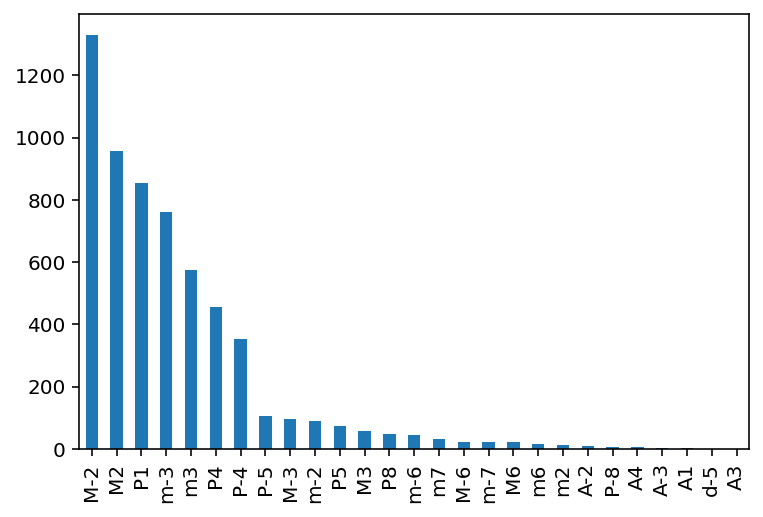

In [123]:
intseries.apply(lambda x: x.diatonic.directedSemiSimpleName).value_counts().plot.bar()